In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [178]:
data = pd.read_csv("Data.csv")

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [180]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [181]:
data.shape

(110527, 14)

In [182]:
 ###No NA value

# Convert ScheduledDay &AppiontmentDay to only date, remove the hours

In [183]:
data["ScheduledDay"] = pd.to_datetime(data['ScheduledDay']).dt.date.astype('datetime64[ns]')
data["AppointmentDay"] = pd.to_datetime(data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [184]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Create new column for day of the week (0=Monday, 1=Tuesday, etc)

In [185]:
data['sch_weekday'] = data["ScheduledDay"].dt.dayofweek

In [186]:
data["app_weekday"] = data["AppointmentDay"].dt.dayofweek

In [187]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4


TypeError: 'str' object is not callable

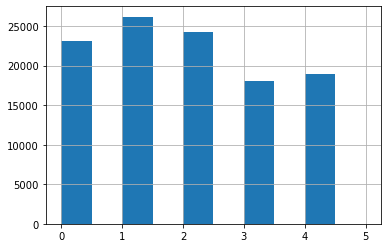

In [188]:
data["sch_weekday"].hist(bins=10)
plt.xlabel("Schedule Weekday")
#Barchart to show the distribution
#Patients schedule most appointment on Tuesday

In [189]:
data['sch_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sch_weekday, dtype: int64

TypeError: 'str' object is not callable

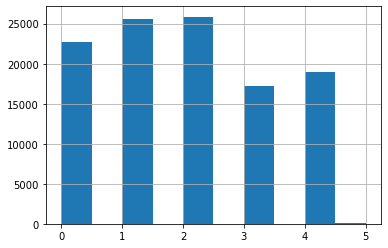

In [190]:
data["app_weekday"].hist(bins=10)
plt.xlabel("Appointment Weekday")

#Wednesday has the most patient appointment 

In [191]:
data["app_weekday"].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: app_weekday, dtype: int64

# Correct the column name

In [192]:
#check each column
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [193]:
#Fix the namne of columns
data=data.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap', 'No-show':'Noshow'})

In [194]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Noshow',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  Noshow          110527 non-null  object        
 14  sch_weekday     110527 non-null  int

In [196]:
#Remove unnucssary columns 
data.drop(['PatientId','AppointmentID','Neighbourhood'], axis=1, inplace=True)

In [197]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow,sch_weekday,app_weekday
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4


In [198]:
data.describe()
#For numerical value only

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,sch_weekday,app_weekday
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


# Plotting target variable: No Show

TypeError: 'str' object is not callable

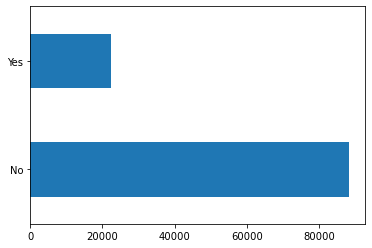

In [199]:
#use value count to convert Noshow data into numerical for plotting
data['Noshow'].value_counts().plot(kind='barh')
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)

In [200]:
data['Noshow'].value_counts()

No     88208
Yes    22319
Name: Noshow, dtype: int64

In [201]:
#percentage of no show
data.shape

(110527, 13)

In [202]:
no_show_rate= 22319/110527
print(no_show_rate)
#About 20% no show rate

0.20193255946510807


# Check for missing value (No missing value)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


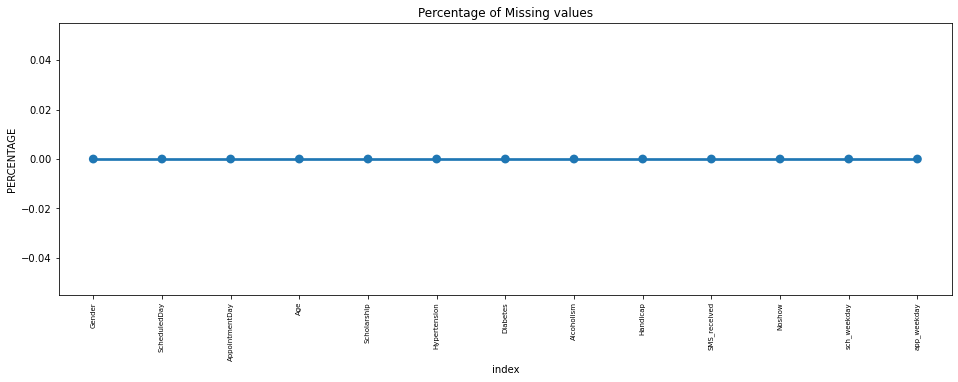

In [203]:
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

#No missing value

# Data cleaning (convert age into groups)

In [204]:
cat = pd.cut(data.Age,bins=[0,2,17,65,115],
                  labels=['Toddler/baby','Child','Adult','Elderly'])
data.insert(5,'Age Group',cat)

In [205]:
data['Age Group'].value_counts()

Adult           69846
Child           19949
Elderly         13301
Toddler/baby     3891
Name: Age Group, dtype: int64

### Toddler/baby: 0-2
### Child: 3-17
### Adult: 18-65
### Elderly: >65

In [206]:
#Remove age column
data.drop(['Age'], axis=1, inplace=True)
list(data)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Age Group',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS_received',
 'Noshow',
 'sch_weekday',
 'app_weekday']

# EDA

## Gender vs No show

<AxesSubplot:xlabel='Gender', ylabel='count'>

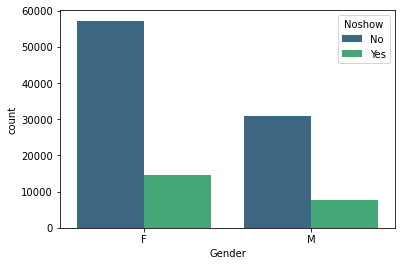

In [207]:
sns.countplot(x='Gender', data=data, hue='Noshow',palette='viridis')

## Schedule weekday vs No show

<AxesSubplot:xlabel='sch_weekday', ylabel='count'>

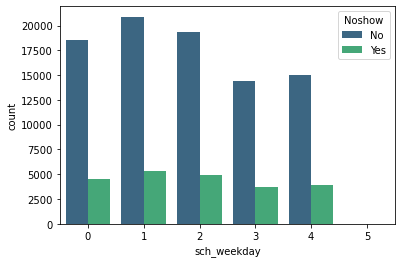

In [208]:
sns.countplot(x='sch_weekday', data=data, hue='Noshow',palette='viridis')

## Appointment weekday vs No show

<AxesSubplot:xlabel='app_weekday', ylabel='count'>

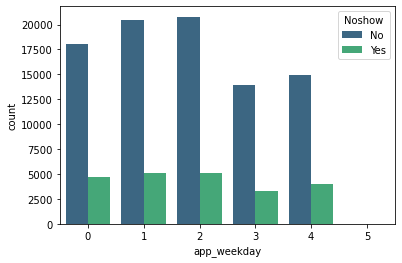

In [209]:
sns.countplot(data=data, x='app_weekday', hue='Noshow', palette='viridis')

# Age vs No show

<AxesSubplot:xlabel='Age Group', ylabel='count'>

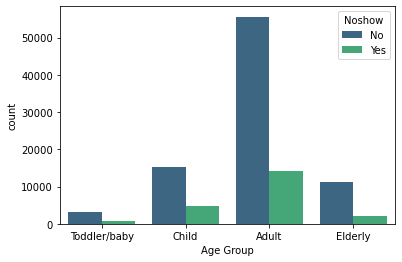

In [210]:
sns.countplot(data=data, x='Age Group', hue='Noshow', palette= 'viridis')

# Scholarship vs Noshow

<AxesSubplot:xlabel='Scholarship', ylabel='count'>

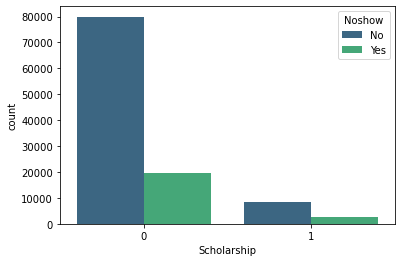

In [211]:
sns.countplot(data=data, x='Scholarship', hue='Noshow', palette= 'viridis' )

# Hypertension vs No show

<AxesSubplot:xlabel='Hypertension', ylabel='count'>

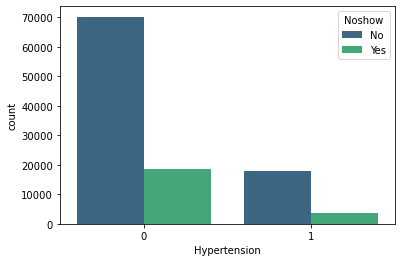

In [212]:
sns.countplot(data=data, x='Hypertension', hue='Noshow', palette= 'viridis' )

# Diabetes vs No show 

<AxesSubplot:xlabel='Diabetes', ylabel='count'>

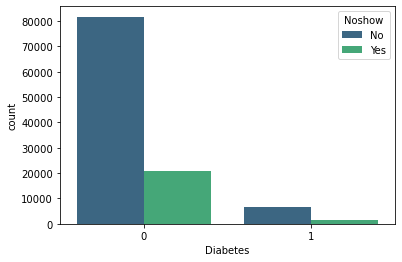

In [213]:
sns.countplot(data=data, x='Diabetes', hue='Noshow', palette= 'viridis' )

# Alcoholism vs No show

<AxesSubplot:xlabel='Alcoholism', ylabel='count'>

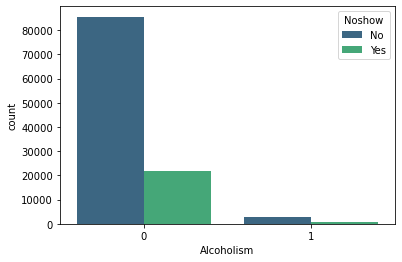

In [214]:
sns.countplot(data=data, x='Alcoholism', hue='Noshow', palette= 'viridis' )

In [215]:
list(data)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Age Group',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS_received',
 'Noshow',
 'sch_weekday',
 'app_weekday']

# Handicap vs No show

<AxesSubplot:xlabel='Handicap', ylabel='count'>

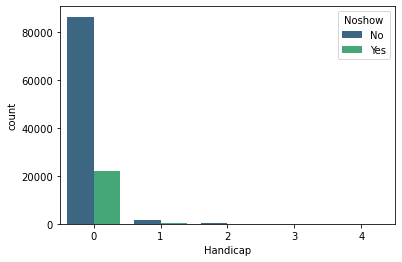

In [216]:
sns.countplot(data=data, x='Handicap', hue='Noshow', palette='viridis')

# SMS_received vs No show

<AxesSubplot:xlabel='SMS_received', ylabel='count'>

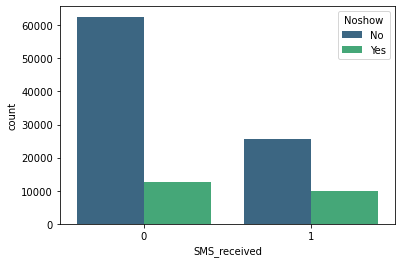

In [217]:
sns.countplot(data=data, x='SMS_received', hue='Noshow', palette='viridis')

# Check correlation of each variable with No show

## Convert categorical variables to dummies

In [218]:
data['Noshow'] = np.where(data.Noshow == 'Yes',1,0)
#Target variable: no show

In [219]:
data['Noshow'].value_counts()

0    88208
1    22319
Name: Noshow, dtype: int64

In [220]:
dummies_data = pd.get_dummies(data)
dummies_data.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow,sch_weekday,app_weekday,Gender_F,Gender_M,Age Group_Toddler/baby,Age Group_Child,Age Group_Adult,Age Group_Elderly
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,1,0,0,0,1,0
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,0,1,0,0,1,0
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,0,0,1,0
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,0,1,0,0
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,1,0,0,0,1,0


<AxesSubplot:>

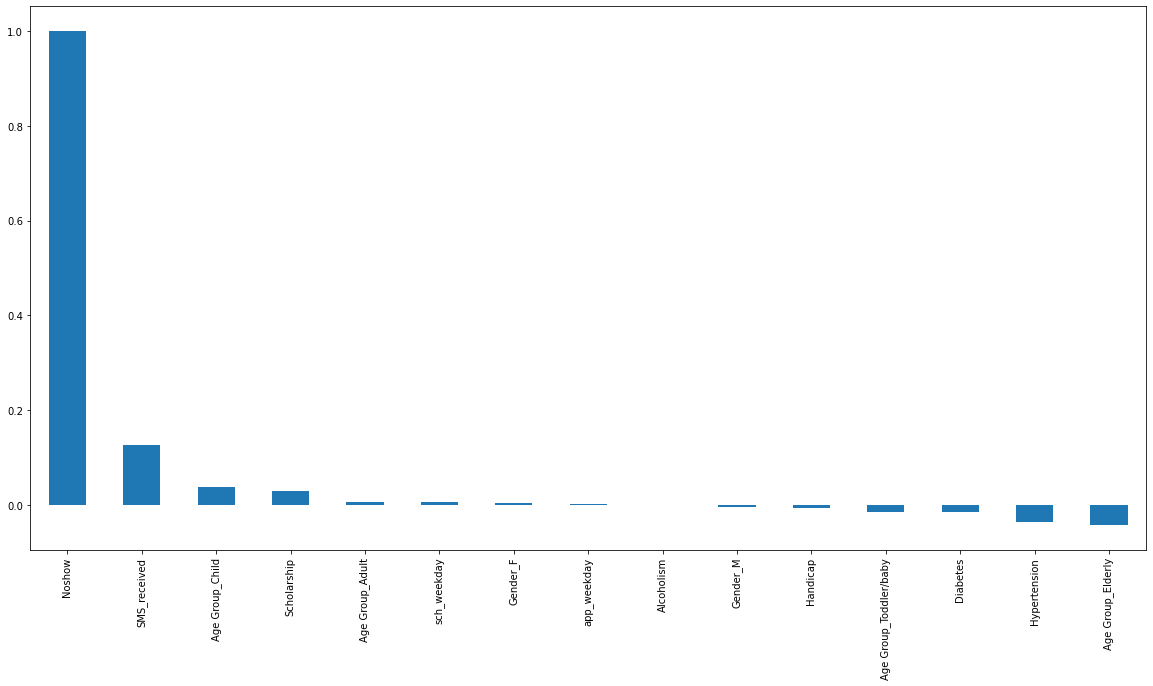

In [221]:
#Correlation
plt.figure(figsize=(20,10))
dummies_data.corr()['Noshow'].sort_values(ascending = False).plot(kind='bar')

### SMS shows strong correation with no show, following with child and scholarship

## Visualize correlation with heatmap

<AxesSubplot:>

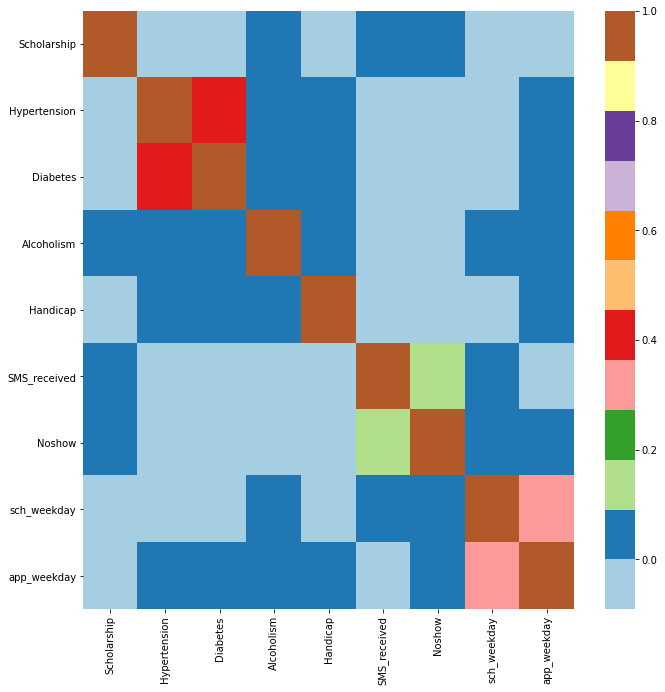

In [222]:
plt.figure(figsize=(11,11))
sns.heatmap(data.corr(), cmap="Paired")

# Findings

##### 1. Female patients has taken more appointments than male patients
##### 2. Appointments scheduled on Tuesday have the highest no show rate
##### 3. Tuesday and Wednesday has the most no show, following by Monday, Thursday and Friday
##### 4. There are around 100000 patients without Scholarship and out of them around 80% have come for the visit and out of the 21000 patients with Scholarship around 75% of them have come for the visit.
##### 5. There are around 75000 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35000 patients who have received SMS around 70% of them have come for the visit.